In [1]:
# 爬虫代码使用老师提供的爬取微博的程序
# 对观察者网的微博内容进行爬取
# 观察者网的微博id为1887344341
# 爬取观察者网2021年1月1日至1月14日的微博
# 爬取生成的文件命名为1887344341.csv

In [2]:
# 导入需要使用的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import sys
import jieba
from snownlp import SnowNLP
from wordcloud import WordCloud
import imageio

In [3]:
# 读取爬取的微博文件并显示
df=pd.read_csv('D:/Files/PythonFiles/python-class-main/python-class-main/05/1887344341.csv') 
df

,id,bid,正文,头条文章url,原始图片url,视频url,位置,日期,工具,点赞数,评论数,转发数,话题,@用户
0,4593390673727478,JDbw7fDGC,#上海拟建议设结婚冷静期#【上海市政协委员：倡导婚前医学检查，设结婚冷静期保障知情权】202...,NaN,https://wx4.sinaimg.cn/large/707e96d5ly1gmnkhu...,NaN,NaN,2021-01-14,微博 weibo.com,760,95,94,上海拟建议设结婚冷静期,NaN
1,4593386722429515,JDbpKac1J,#男子酒后咬死3斤多重活鱼#【男子酒后打砸饭店 “顺便”咬死一条3斤多重活鱼 被行拘9天】1...,NaN,NaN,https://gslb.miaopai.com/stream/5MPmK1wSEhe38V...,NaN,2021-01-14,微博 weibo.com,488,98,15,男子酒后咬死3斤多重活鱼,NaN
2,4593383723766784,JDbkUfNUA,这个重返火场的背影让人感动！火场温度过高，消防员趴雪地降温，之后又返回火场……@山东消防 共...,NaN,NaN,http://f.video.weibocdn.com/2ANfc4KIlx07JxVtvk...,NaN,2021-01-14,微博 weibo.com,760,36,40,NaN,山东消防
3,4593378690599827,JDbcN2w2D,为人民，畏人民,NaN,https://wx2.sinaimg.cn/large/707e96d5ly1gmnj1e...,NaN,NaN,2021-01-14,微博 weibo.com,2178,134,118,NaN,NaN
4,4593373909093595,JDb54C9ET,【有人质疑中国疫苗 杜特尔特：中国人很明智，他们不会冒险生产】13日，菲律宾总统杜特尔特在讲...,NaN,NaN,http://f.video.weibocdn.com/000R99Cmgx07JzqTXE...,NaN,2021-01-14,微博 weibo.com,515,78,28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,4588468887883090,JB7tKx4KC,【#新年第一场升旗# 此刻，一起转发，祝福祖国！】今晨，#天安门广场新年首次升旗仪式#举行。...,NaN,NaN,http://f.video.weibocdn.com/LrQEGWGalx07JdPQsy...,NaN,2021-01-01,NaN,625,21,104,"新年第一场升旗,天安门广场新年首次升旗仪式",NaN
1003,4588463997587585,JB7lRvPSp,【人民日报政文：抄袭者不能成榜样，强势平台是不是也该反省？】2020年的最后一天，曾经深陷抄...,NaN,https://wx4.sinaimg.cn/large/707e96d5ly1gm7ux8...,NaN,NaN,2021-01-01,NaN,38459,1252,3487,"于正道歉,郭敬明向庄羽道歉",NaN
1004,4588459643639746,JB7eQfgRA,【#英首相称60%英国新冠病例感染变异病毒# 呼吁民众居家跨年】当地时间12月30日，英国首...,NaN,NaN,http://f.video.weibocdn.com/U4JuTULalx07JcS30g...,NaN,2021-01-01,NaN,657,122,47,英首相称60%英国新冠病例感染变异病毒,NaN
1005,4588455013911477,JB77ngpyl,【美媒竟炒作“中国赏金”】观察者网注意到，12月30日，美国时政新闻网站Axios首先援引两...,NaN,https://wx1.sinaimg.cn/large/707e96d5ly1gm7tvy...,NaN,NaN,2021-01-01,NaN,743,103,53,NaN,NaN


In [4]:
# 进行数据清洗，删除id,url,位置等无用的信息
data=df.drop(['id','bid','头条文章url','原始图片url','视频url','位置','工具','话题','@用户'], axis=1)
# 显示数据清洗后的内容
data

,正文,日期,点赞数,评论数,转发数
0,#上海拟建议设结婚冷静期#【上海市政协委员：倡导婚前医学检查，设结婚冷静期保障知情权】202...,2021-01-14,760,95,94
1,#男子酒后咬死3斤多重活鱼#【男子酒后打砸饭店 “顺便”咬死一条3斤多重活鱼 被行拘9天】1...,2021-01-14,488,98,15
2,这个重返火场的背影让人感动！火场温度过高，消防员趴雪地降温，之后又返回火场……@山东消防 共...,2021-01-14,760,36,40
3,为人民，畏人民,2021-01-14,2178,134,118
4,【有人质疑中国疫苗 杜特尔特：中国人很明智，他们不会冒险生产】13日，菲律宾总统杜特尔特在讲...,2021-01-14,515,78,28
...,...,...,...,...,...
1002,【#新年第一场升旗# 此刻，一起转发，祝福祖国！】今晨，#天安门广场新年首次升旗仪式#举行。...,2021-01-01,625,21,104
1003,【人民日报政文：抄袭者不能成榜样，强势平台是不是也该反省？】2020年的最后一天，曾经深陷抄...,2021-01-01,38459,1252,3487
1004,【#英首相称60%英国新冠病例感染变异病毒# 呼吁民众居家跨年】当地时间12月30日，英国首...,2021-01-01,657,122,47
1005,【美媒竟炒作“中国赏金”】观察者网注意到，12月30日，美国时政新闻网站Axios首先援引两...,2021-01-01,743,103,53


In [5]:
# 储存数据清洗后的内容为data_cleaning.csv
data.to_csv('data_cleaning.csv',index=0)

In [6]:
# 读取数据清洗后的文件
data=pd.read_csv('data_cleaning.csv')
# 统计相同时期所发的微博数目并储存为data_cleaning_days.csv
days=data['日期'].value_counts()
days.to_csv("data_cleaning_days.csv",header=['location'],encoding='utf-8')
# 读取data_cleaning_days.csv文件并修改表头，重新储存并显示
df=pd.read_csv("data_cleaning_days.csv", header=0)
df.columns=['date','times']
df.to_csv("data_cleaning_days.csv", index=False)
df

,date,times
0,2021-01-08,85
1,2021-01-14,84
2,2021-01-12,83
3,2021-01-13,80
4,2021-01-07,75
5,2021-01-04,74
6,2021-01-11,73
7,2021-01-05,72
8,2021-01-06,69
9,2021-01-09,68


In [7]:
# 读取data_cleaning_days.csv文件并根据日期顺序排列
days=pd.read_csv('data_cleaning_days.csv')
days = days.sort_values(by = 'date')
# 重新储存文件
days.to_csv("data_cleaning_days.csv", index=False)
days

,date,times
10,2021-01-01,63
13,2021-01-02,58
12,2021-01-03,61
5,2021-01-04,74
7,2021-01-05,72
8,2021-01-06,69
4,2021-01-07,75
0,2021-01-08,85
9,2021-01-09,68
11,2021-01-10,62


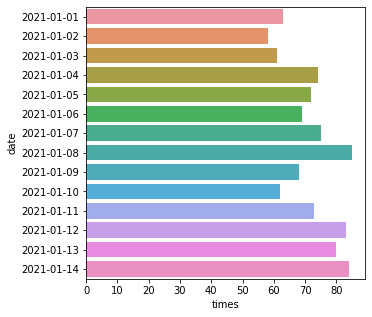

In [8]:
# 读取按时间排序后的文件并使用seaborn绘图
data_cleaning_days = pd.read_csv("data_cleaning_days.csv")
plt.figure(figsize=(5, 5))
sns.barplot(x=data_cleaning_days.times, y=data_cleaning_days.date)
plt.show()

In [9]:
# 对数据清洗后的文件的表头重新命名
data_cleaning=pd.read_csv('data_cleaning.csv')
data_cleaning.columns=['main','date','like','review','forward']
data_cleaning.to_csv("data_cleaning.csv", index=False)
data_cleaning

,main,date,like,review,forward
0,#上海拟建议设结婚冷静期#【上海市政协委员：倡导婚前医学检查，设结婚冷静期保障知情权】202...,2021-01-14,760,95,94
1,#男子酒后咬死3斤多重活鱼#【男子酒后打砸饭店 “顺便”咬死一条3斤多重活鱼 被行拘9天】1...,2021-01-14,488,98,15
2,这个重返火场的背影让人感动！火场温度过高，消防员趴雪地降温，之后又返回火场……@山东消防 共...,2021-01-14,760,36,40
3,为人民，畏人民,2021-01-14,2178,134,118
4,【有人质疑中国疫苗 杜特尔特：中国人很明智，他们不会冒险生产】13日，菲律宾总统杜特尔特在讲...,2021-01-14,515,78,28
...,...,...,...,...,...
1002,【#新年第一场升旗# 此刻，一起转发，祝福祖国！】今晨，#天安门广场新年首次升旗仪式#举行。...,2021-01-01,625,21,104
1003,【人民日报政文：抄袭者不能成榜样，强势平台是不是也该反省？】2020年的最后一天，曾经深陷抄...,2021-01-01,38459,1252,3487
1004,【#英首相称60%英国新冠病例感染变异病毒# 呼吁民众居家跨年】当地时间12月30日，英国首...,2021-01-01,657,122,47
1005,【美媒竟炒作“中国赏金”】观察者网注意到，12月30日，美国时政新闻网站Axios首先援引两...,2021-01-01,743,103,53


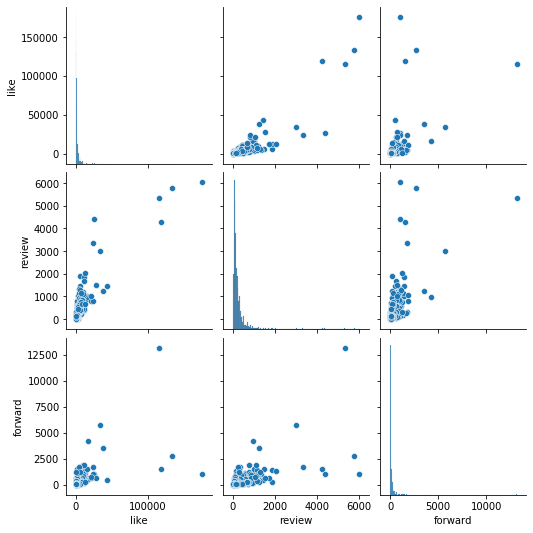

In [10]:
# 绘制点赞数，评论数，转发数之间的散点图
sns.pairplot(data_cleaning[['date','like','review','forward']])
plt.show()

In [12]:
# 对点赞数进行排序并选出点赞数前十的微博
data_cleaning=pd.read_csv('data_cleaning.csv')
like = data_cleaning.sort_values(by = 'like',ascending=False).head(10)
like

,main,date,like,review,forward
749,【#中领馆回应李娜退出中国国籍#：与知名运动员同名，已在韩国结婚定居多年】中国驻釜山总领事馆...,2021-01-05,176084,6034,1051
365,【#美国各大软件联合封杀特朗普#】当地时间1月9日，一张福克斯新闻的“截图”在推特上热传，上...,2021-01-10,133693,5775,2711
266,李子柒做了次泡菜，结果被韩国网友围攻了…“泡菜是我们韩国的传统食物”、“中国这么喜欢韩国文化...,2021-01-11,118723,4262,1539
887,【广西一47岁男子明知自己患有艾滋病仍强奸15岁女生 被判5年】47岁的广西都安男子袁某某，...,2021-01-02,115654,5340,13163
276,【嫌机场核酸检测贵，#一家八口躲过印尼空难#】1月9日，印尼一架载有62人的客机发生空难，致...,2021-01-11,43255,1454,477
1003,【人民日报政文：抄袭者不能成榜样，强势平台是不是也该反省？】2020年的最后一天，曾经深陷抄...,2021-01-01,38459,1252,3487
606,现在的美国国会.......（@今日俄罗斯RT ）#特朗普支持者闯入美国国会# #美国国会...,2021-01-07,34082,3018,5721
905,【#数百人不戴口罩参加特朗普跨年派对# 总统本人却临时“放鸽子了”】2020年12月31日，...,2021-01-02,28070,1520,668
535,【#山东肥城通报拒服兵役案例#，当事人被实施多项联合惩戒】1月7日，山东肥城市人民政府网站发...,2021-01-07,26161,4393,1023
761,【#瑞典媒体曝光美国施压排除华为内幕# ，华春莹：中国是美国胁迫外交的受害者】就瑞典媒体曝光...,2021-01-04,24140,797,987


In [13]:
# 对评论数进行排序并显示排名前十的微博
review = data_cleaning.sort_values(by = 'review',ascending=False).head(10)
review

,main,date,like,review,forward
749,【#中领馆回应李娜退出中国国籍#：与知名运动员同名，已在韩国结婚定居多年】中国驻釜山总领事馆...,2021-01-05,176084,6034,1051
365,【#美国各大软件联合封杀特朗普#】当地时间1月9日，一张福克斯新闻的“截图”在推特上热传，上...,2021-01-10,133693,5775,2711
887,【广西一47岁男子明知自己患有艾滋病仍强奸15岁女生 被判5年】47岁的广西都安男子袁某某，...,2021-01-02,115654,5340,13163
535,【#山东肥城通报拒服兵役案例#，当事人被实施多项联合惩戒】1月7日，山东肥城市人民政府网站发...,2021-01-07,26161,4393,1023
266,李子柒做了次泡菜，结果被韩国网友围攻了…“泡菜是我们韩国的传统食物”、“中国这么喜欢韩国文化...,2021-01-11,118723,4262,1539
985,【上海发现首例来自英国变异新冠病毒感染病例】#上海发现来自英国变异新冠病毒感染病例# 据《中...,2021-01-01,23568,3339,1723
606,现在的美国国会.......（@今日俄罗斯RT ）#特朗普支持者闯入美国国会# #美国国会...,2021-01-07,34082,3018,5721
511,【蔓延到日本！#上千名日本民众在东京游行支持特朗普#】1月6日，上千名日本民众走上东京街头，...,2021-01-08,12518,2035,1277
446,#石家庄全市群众居家7天#,2021-01-09,6227,1886,224
462,【#特朗普女支持者遭枪杀前直播画面#曝光：欢笑自拍走向国会大厦】1月6日，一名特朗普女性支持...,2021-01-08,11753,1847,1452


In [14]:
# 对转发数进行排序并显示排名前十的微博
forward = data_cleaning.sort_values(by = 'forward',ascending=False).head(10)
forward

,main,date,like,review,forward
887,【广西一47岁男子明知自己患有艾滋病仍强奸15岁女生 被判5年】47岁的广西都安男子袁某某，...,2021-01-02,115654,5340,13163
606,现在的美国国会.......（@今日俄罗斯RT ）#特朗普支持者闯入美国国会# #美国国会...,2021-01-07,34082,3018,5721
589,美国华盛顿 vs 中国香港 微丢的微博视频,2021-01-07,16726,962,4244
1003,【人民日报政文：抄袭者不能成榜样，强势平台是不是也该反省？】2020年的最后一天，曾经深陷抄...,2021-01-01,38459,1252,3487
365,【#美国各大软件联合封杀特朗普#】当地时间1月9日，一张福克斯新闻的“截图”在推特上热传，上...,2021-01-10,133693,5775,2711
87,【石家庄“封城”后滞留大学生遇回家难：九天花费两千元 有学生步行20公里回家】石家庄紧急“封...,2021-01-13,10542,787,1889
754,“这个世界上是有奥特曼的”,2021-01-04,11373,1080,1846
534,【今天，一起怀念周总理】他理想坚定，高风亮节，功勋卓著，虚怀若谷；他是人民的“总服务员”，严...,2021-01-08,4725,334,1726
985,【上海发现首例来自英国变异新冠病毒感染病例】#上海发现来自英国变异新冠病毒感染病例# 据《中...,2021-01-01,23568,3339,1723
777,2011年经济参考报的旧闻：《雀巢利用垄断地位克扣奶农 平均一桶奶扣1公斤》双城市是黑龙江省...,2021-01-04,4600,253,1671


In [15]:
# 对数据清洗后的文件进行分词并储存为tweets.csv
tweets = pd.read_csv('data_cleaning.csv', usecols=['main'],encoding='utf-8')
tweets['jieba'] = tweets.apply(lambda x: ' '.join(jieba.cut(x['main'])), axis=1)
tweets.to_csv("tweets.csv",encoding='utf-8', index=False)
tweets

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Asus\AppData\Local\Temp\jieba.cache
Loading model cost 0.628 seconds.
Prefix dict has been built successfully.


,main,jieba
0,#上海拟建议设结婚冷静期#【上海市政协委员：倡导婚前医学检查，设结婚冷静期保障知情权】202...,# 上海 拟 建议 设 结婚 冷静 期 # 【 上海市政协 委员 ： 倡导 婚前 医学 检查...
1,#男子酒后咬死3斤多重活鱼#【男子酒后打砸饭店 “顺便”咬死一条3斤多重活鱼 被行拘9天】1...,# 男子 酒后 咬 死 3 斤 多 重活 鱼 # 【 男子 酒后 打砸 饭店 “ 顺便 ...
2,这个重返火场的背影让人感动！火场温度过高，消防员趴雪地降温，之后又返回火场……@山东消防 共...,这个 重返 火场 的 背影 让 人 感动 ！ 火场 温度 过高 ， 消防员 趴 雪地 降温 ...
3,为人民，畏人民,为 人民 ， 畏 人民
4,【有人质疑中国疫苗 杜特尔特：中国人很明智，他们不会冒险生产】13日，菲律宾总统杜特尔特在讲...,【 有人 质疑 中国 疫苗 杜特 尔特 ： 中国 人 很 明智 ， 他们 不会 冒险 生...
...,...,...
1002,【#新年第一场升旗# 此刻，一起转发，祝福祖国！】今晨，#天安门广场新年首次升旗仪式#举行。...,【 # 新年 第一场 升旗 # 此刻 ， 一起 转发 ， 祝福 祖国 ！ 】 今晨 ， ...
1003,【人民日报政文：抄袭者不能成榜样，强势平台是不是也该反省？】2020年的最后一天，曾经深陷抄...,【 人民日报 政文 ： 抄袭 者 不能 成 榜样 ， 强势 平台 是不是 也 该 反省 ？ ...
1004,【#英首相称60%英国新冠病例感染变异病毒# 呼吁民众居家跨年】当地时间12月30日，英国首...,【 # 英首相 称 60% 英国 新冠 病例 感染 变异 病毒 # 呼吁 民众 居家 跨...
1005,【美媒竟炒作“中国赏金”】观察者网注意到，12月30日，美国时政新闻网站Axios首先援引两...,【 美媒竟 炒作 “ 中国 赏金 ” 】 观察者 网 注意 到 ， 12 月 30 日 ， ...


In [16]:
# 对数据清洗后的文件进行情感分数的分析并显示
tweets1 = pd.read_csv('data_cleaning.csv', usecols=['main'],encoding='utf-8')
tweets1['snownlp分词'] = tweets.apply(lambda x: ' '.join(SnowNLP(x['main']).words), axis=1)
tweets1['情感分数'] = tweets.apply(lambda x: SnowNLP(x['main']).sentiments, axis=1)
tweets1

,main,snownlp分词,情感分数
0,#上海拟建议设结婚冷静期#【上海市政协委员：倡导婚前医学检查，设结婚冷静期保障知情权】202...,# 上海 拟 建议 设 结婚 冷静 期 #【 上海 市政协 委员 ： 倡导 婚 前 医学 检...,1.000000e+00
1,#男子酒后咬死3斤多重活鱼#【男子酒后打砸饭店 “顺便”咬死一条3斤多重活鱼 被行拘9天】1...,# 男子 酒后 咬 死 3 斤 多 重 活 鱼 #【 男子 酒后 打 砸 饭店 “ 顺便 ”...,4.440892e-16
2,这个重返火场的背影让人感动！火场温度过高，消防员趴雪地降温，之后又返回火场……@山东消防 共...,这个 重返 火场 的 背影 让 人 感动 ！ 火场 温度 过 高 ， 消防 员 趴 雪 地 ...,6.452875e-01
3,为人民，畏人民,为 人民 ， 畏 人民,9.758144e-01
4,【有人质疑中国疫苗 杜特尔特：中国人很明智，他们不会冒险生产】13日，菲律宾总统杜特尔特在讲...,【 有人 质疑 中国 疫苗 杜特尔 特 ： 中国 人 很 明智 ， 他们 不 会 冒险 生产...,1.000000e+00
...,...,...,...
1002,【#新年第一场升旗# 此刻，一起转发，祝福祖国！】今晨，#天安门广场新年首次升旗仪式#举行。...,【# 新年 第一 场 升旗 # 此刻 ， 一起 转发 ， 祝福 祖国 ！】 今晨 ，# 天安...,1.000000e+00
1003,【人民日报政文：抄袭者不能成榜样，强势平台是不是也该反省？】2020年的最后一天，曾经深陷抄...,【 人民日报 政 文 ： 抄 袭者 不 能 成 榜样 ， 强势 平台 是 不 是 也该 反省...,9.999987e-01
1004,【#英首相称60%英国新冠病例感染变异病毒# 呼吁民众居家跨年】当地时间12月30日，英国首...,【# 英 首相 称 60% 英国 新 冠 病例 感染 变异 病毒 # 呼吁 民众 居 家 跨...,6.936359e-01
1005,【美媒竟炒作“中国赏金”】观察者网注意到，12月30日，美国时政新闻网站Axios首先援引两...,【 美 媒竟 炒作 “ 中国 赏 金 ”】 观察者 网 注意 到 ，12 月 30 日 ， ...,9.976097e-01


In [17]:
# 将情感分析后的数据储存为tweets1.csv
tweets1.to_csv("tweets1.csv", index=False,encoding='utf-8')

In [18]:
# 对数据清洗后的数据进行分词并输出为txt格式
file_object2=open('data_cleaning.csv',encoding='utf-8').read().split('\n')  #一行行的读取内容
Rs2=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = jieba.lcut_for_search(file_object2[i])
    for w in seg_list :#读取每一行分词
        result.append(w)
    Rs2.append(result)#将该行分词写入列表形式的总分词列表
#写入CSV
file=open('tweets2.txt','w',encoding='utf-8')
# writer = txt.writer(file)#定义写入格式
# writer.writerows(Rs2)#按行写入
file.write(str(Rs2))
file.close()

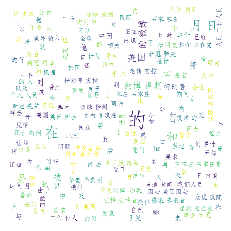

In [19]:
# 将txt文件读取转换为字符，使用词云进行绘图
Rs3=str(Rs2)
Rs3=Rs3.replace("'",'')
wc = WordCloud(
        # 设置字体，不指定就会出现乱码
        # 设置背景色
        font_path="C:\\Windows\\Fonts\\STFANGSO.ttf",
        background_color='white',
        # 设置背景宽
        width=500,
        # 设置背景高
        height=500,
        # 最大字体
        max_font_size=50,
        # 最小字体
        min_font_size=10,
        mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(Rs3)
wc.to_file(r"wordcloud.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

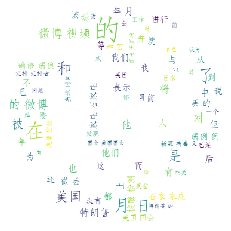

In [20]:
# 读取观察者网的logo并应用为词云的背景进行绘图
bg = imageio.imread("user.jpg")
wc = WordCloud(
        # 设置字体，不指定就会出现乱码
        font_path="C:\\Windows\\Fonts\\STFANGSO.ttf",
        # 设置背景色
        background_color='white',
        # 设置背景宽
        width=500,
        # 设置背景高
        height=500,
        # 设置背景
        mask=bg,
        # 最大字体
        max_font_size=50,
        # 最小字体
        min_font_size=10,
        mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(Rs3)
wc.to_file("wordcloud_2.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()